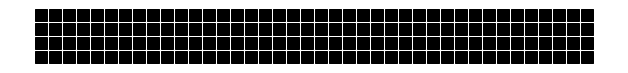

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_grid(array: np.array, ax, inbetween=0.2):
    pat = np.empty(shape=array.shape, dtype=patches.Rectangle)
    for xi in range(array.shape[0]):
        for yi in range(array.shape[1]):
            color = list(array[xi, yi] / 255)
            xp = (1 + inbetween) * xi
            yp = (1 + inbetween) * yi
            sq = patches.Rectangle((xp, yp), wid, hei, color=color, fill=True)
            pat[xi, yi] = sq
            ax.add_patch(sq)

    ax.relim()
    ax.autoscale_view()
    plt.axis('off')
    return pat

fig = plt.figure(figsize=(11, 8))
ax = plt.subplot(111, aspect='equal')
blank_array = np.array([[0, 0, 0]] * 160).reshape((40, 4, 3))
pat = draw_grid(blank_array, ax)
plt.show()

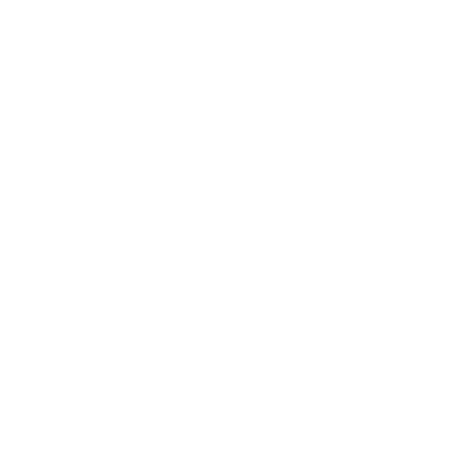

In [72]:
from IPython.display import HTML
import time

class LedAnimation:
    def __init__(self, interval=100):
        """ interval is milliseconds between frames """
        self.interval = interval
        self.blank_array = np.array([[0, 0, 0]] * 160).reshape((40, 4, 3))
        self.fig = plt.figure(figsize=(11, 8))
        self.ax = plt.subplot(111, aspect='equal')
        self.pat = None
        
    def init(self):
        # return flattened draw_grid result as list
        self.pat = draw_grid(self.blank_array, ax)
        return list(pat.flatten())

    def animate(self, i):
        # using blitting. default implementation has simple animation
        
        # this way takes longer to render but is easier to design
        # redraw entire frame from array
        # simply copy the array, edit, and return flattened draw_grid result as list
        updated_array = self.blank_array.copy()
        updated_array[i, :] = [255, 0, 0]
        self.pat = draw_grid(updated_array, ax)
        return list(pat.flatten())
    
    def generate(self):
        # runs faster when blit = true, even if we still update all artists
        anim = animation.FuncAnimation(fig,
                                       self.animate,
                                       init_func=self.init,
                                       frames=self.blank_array.shape[0],
                                       interval=self.interval,
                                       blit=True)
        return HTML(anim.to_jshtml())

default_anim = LedAnimation()
default_anim.generate()